# 3. Encoding - Scaling

## 3.1 Encoding

**Encoding:** Changing the forms of representation of variables

**Label Encoding** process is applied to the ***ordinal variables***.
    
    - Example: 
    
        | EDUCATION        	| EDU_LABEL 	|
        |------------------	|-----------	|
        | Pre-School       	| 0         	|
        | Secondary School 	| 1         	|
        | High School      	| 2         	|
        | Graduate         	| 3         	|
        | Master           	| 4         	|
        | PhD              	| 5         	|

**One-hot Encoding** process is applied to the ***nominal variables*** outside the Ordinal.
    
    - Not Example:
    
        | TEAM 	| EDU_LABEL 	|
        |------	|-----------	|
        | GS   	| 0         	|
        | FB   	| 1         	|
        | BJK  	| 2         	|
        | TS   	| 3         	|
        | BC   	| 4         	|
        | RM   	| 5         	|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
# Data set for large scale application
def load_application_train():
    data = pd.read_csv("datasets/application_train2.csv")
    return data


df_application = load_application_train()
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Data set for small scale application
def load_titanic():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df_titanic = load_titanic()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [5]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold= 20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

## 3.2 Label Encoding

**Binary Encoding**: If a categorical variable has two classes, the process to be done

**Label Encoding**: If there is more than two and ordinal classes, the process to be done

Why do we do this?
- There is a standard format that algorithms expect from us.To make the data appropriate.
- Improving and developing model forecast performance with this standard

In [6]:
le = LabelEncoder()
le.fit_transform(df_titanic["Sex"])[0:5]

# The first value it sees as alphabetical gives 0, the latter is 1.
# female : 0 , male : 1

# If you forget which value 0, which value 1 corresponds to 1, you can learn this with inverse_transform.
le.inverse_transform([0, 1]) 


array(['female', 'male'], dtype=object)

In [7]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [8]:
df_titanic = load_titanic()

In [9]:
binary_cols = [col for col in df_titanic.columns if df_titanic[col].dtype not in ["int64", "float64"] and df_titanic[col].nunique() == 2]

In [10]:
binary_cols

['Sex']

In [11]:
for col in binary_cols:
    label_encoder(df_titanic,col)

In [12]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [13]:
df_application = load_application_train()
df_application.shape

(307511, 122)

In [14]:
binary_cols = [col for col in df_application.columns if df_application[col].dtype not in ["int64","float64"] and df_application[col].nunique() == 2]

In [15]:
df_application[binary_cols].head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [16]:
for col in binary_cols:
    label_encoder(df_application,col)

In [17]:
df_application[binary_cols].head()
# Here, when we apply Label Encoding, Label Encoding process gave the expression 2 to the expressions with nan value in the EMERGENCYSTATE_MODE column.This process will actually be very useful for us later, but we will still solve it in the future.

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


In [18]:
df_titanic = load_titanic()

df_titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
df_titanic["Embarked"].nunique()

3

In [20]:
len(df_titanic["Embarked"].unique())

4

In [21]:
df_titanic["Embarked"].unique() # It takes nan values. 

array(['S', 'C', 'Q', nan], dtype=object)

## 3.3 One Hot Encoding

In one-hot Encoding operations, you need to get it as drop_first = True.Otherwise, there may be problems later.

In [22]:
df_titanic = load_titanic()
df_titanic.head()
df_titanic["Embarked"].value_counts() # Nominal data

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
pd.get_dummies(df_titanic, columns= ["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


In [24]:
pd.get_dummies(df_titanic, columns= ["Embarked"],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [25]:
pd.get_dummies(df_titanic, columns= ["Embarked"],dummy_na=True).head() # It also creates a separate column for nan values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


In [26]:
pd.get_dummies(df_titanic, columns=["Sex","Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


In [27]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [28]:
df_titanic = load_titanic()

In [29]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_titanic)

Observations: 891
Variables: 12
categorical_cols: 6
numerical_cols: 3
cardinal_cols: 3
nominal_cols: 4


In [30]:
categorical_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [31]:
one_hot_encoding_cols = [col for col in df_titanic.columns if 10 >= df_titanic[col].nunique() > 2]

In [32]:
one_hot_encoding_cols

['Pclass', 'SibSp', 'Parch', 'Embarked']

In [33]:
one_hot_encoder(df_titanic, one_hot_encoding_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## 3.4 Rare Encoding

1. Analysis of the minimum multiplicity of categorical variables. (Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.)
2. Analysis of the relationship between rare categories and dependent variables. (Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.)
3. We'll write rare Encoder. (Rare encoder yazacağız.)


### 3.4.1 Analysis of the minimum multiplicity of categorical variables

In [35]:
df_application = load_application_train()
df_application["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [36]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_application)

Observations: 307511
Variables: 122
categorical_cols: 54
numerical_cols: 67
cardinal_cols: 1
nominal_cols: 39


In [39]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [40]:
for col in categorical_cols:
    cat_summary(df_application,col)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232 90.479
Revolving loans               29279  9.521
##########################################
     CODE_GENDER  Ratio
F         202448 65.834
M         105059 34.164
XNA            4  0.001
##########################################
   FLAG_OWN_CAR  Ratio
N        202924 65.989
Y        104587 34.011
##########################################
   FLAG_OWN_REALTY  Ratio
Y           213312 69.367
N            94199 30.633
##########################################
                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            11370  3.697
Children                    3267  1.062
Other_B                     1770  0.576
Other_A                      866  0.282
Group of people              271  0.088
##########################################
                      NAME_INCOME_TYPE  Ratio
Working                         158774 51.632
C

### 3.4.2 Analysis of the relationship between rare categories and dependent variables

In [41]:
df_application["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [42]:
df_application.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [43]:
def rare_analyser(dataframe, target, cat_cols):
    for col in categorical_cols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [44]:
rare_analyser(df_application, "TARGET",categorical_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    202448  0.658        0.070
M    105059  0.342        0.101
XNA       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Group of people     271  0.001        0.085
Other_A             866  0.003        0.088
Other_B            1770  0.006        0.098
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 8
                       COUNT  RATIO  TARGET_MEAN
Businessman               10  0.

### 3.4.3 Rare Encoder

In [47]:
def rare_encoder(dataframe, rare_percentage):
    temp_df = dataframe.copy()
    
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O" and
                    (temp_df[col].value_counts() / len(temp_df) < rare_percentage).any(axis=None)]
    
    for variable in rare_columns:
        tmp = temp_df[variable].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_percentage].index
        temp_df[variable] = np.where(temp_df[variable].isin(rare_labels), 'Rare', temp_df[variable])

    return temp_df

In [48]:
df_application_new = rare_encoder(df_application,0.01)
rare_analyser(df_application_new, "TARGET", categorical_cols)
df_application["OCCUPATION_TYPE"].value_counts()

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     202448  0.658        0.070
M     105059  0.342        0.101
Rare       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Rare               2907  0.009        0.094
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 5
                       COUNT  RATIO  TARGET_MEAN
Commercial associate   71617  0.233        0.075
Pensioner              55362  0.180        0.054
Rare              

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

## 3.5 Feature Scaling

- Purpose 1 : To eliminate the difference in measurement between variables.
- Purpose 2 : In particular, it is the condition of shortening the train working time of algorithms using gradient descent.
- Purpose 3 : Reducing bias

There is no need to feature scaling for methods with tree structure.

### 3.5.1 StandardScaler 
Classic standardization. Remove the average, divide it into standard deviation.z = (x - u) / s

- x : The whole variables
- u : mean
- s : standard deviation


In [50]:
df_titanic = load_titanic()

In [53]:
ss = StandardScaler()
df_titanic["Age_standard_scaler"] = ss.fit_transform(df_titanic[["Age"]])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


### 3.5.2 RobustScaler

- Remove  the median, divide to Inter Quartile Range. 
- It is not affected by outlier values.


In [54]:
rs = RobustScaler()
df_titanic["Age_robuts_scaler"] = rs.fit_transform(df_titanic[["Age"]])
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


### 3.5.3 MinMaxScaler

Variable transformation between 2 values given

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [56]:
mms = MinMaxScaler()
df_titanic["Age_min_max_scaler"] = mms.fit_transform(df_titanic[["Age"]])
df_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [57]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


In [58]:
age_cols = [col for col in df_titanic.columns if "Age" in col]

In [59]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: Age, dtype: float64


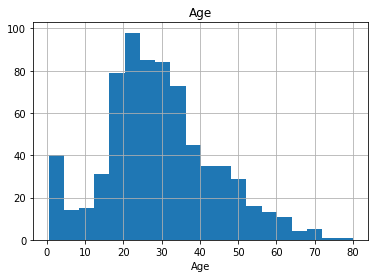

count   714.000
mean      0.000
std       1.001
min      -2.017
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: Age_standard_scaler, dtype: float64


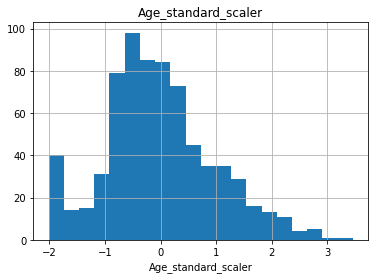

count   714.000
mean      0.095
std       0.813
min      -1.543
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: Age_robuts_scaler, dtype: float64


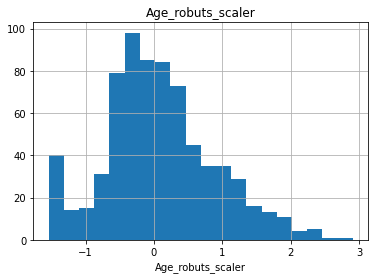

count   714.000
mean      0.368
std       0.183
min       0.000
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: Age_min_max_scaler, dtype: float64


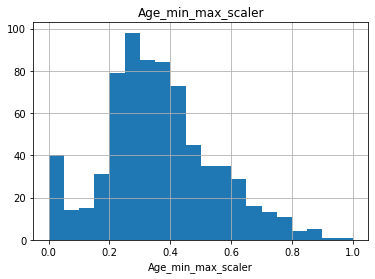

In [60]:
for col in age_cols:
    num_summary(df_titanic, col, plot=True)

## 3.6 Numerical to Categorical: Converting Numerical Variables to Categorical Variables (Binning)

The qcut method sects the values of a variable from small to large and divides them into 5 parts according to the quarter values.

In [62]:
df_titanic["Age_qcut"] = pd.qcut(df_titanic['Age'], 5)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435,"(31.8, 41.0]"
